In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time,datetime
%matplotlib inline

In [3]:
cust_data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\VINAYAK007\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
cust_data.columns.str.replace(" ","_")

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

# Changing to datetime format

In [5]:
cust_data['Created Date']=pd.to_datetime(cust_data['Created Date'])
cust_data['Closed Date']=pd.to_datetime(cust_data['Closed Date'])

In [6]:
cust_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# Adding New Column and time elapsed b/w created and closed date

In [7]:
cust_data['Request_Closing_Time']=cust_data['Closed Date']-cust_data['Created Date']
cust_data.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)",0 days 04:08:49


In [8]:
cust_data['Request_Closing_Time'].tail(4)

300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [11]:
import datetime as dt
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

    

In [12]:
cust_data['Request_Closing_In_Hr'] = cust_data['Request_Closing_Time'].apply(toHr)
cust_data['Request_Closing_In_Hr'].head(5)

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [13]:
# Function to categorize hours - Less than 2 hours - Fast, Between 2 to 4 hours - Acceptable, Between 4 to 6 - Slow, More than 6 hours - Very Slow
import math
def hrToCategory(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif ( hr >= 2.0 and hr<=4.0):
        return 'Acceptable'
    elif (hr>=4.0 and hr<=6.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

cust_data['Request_Closing_Time_Category'] = cust_data['Request_Closing_In_Hr'].apply(hrToCategory)

cust_data['Request_Closing_Time_Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

In [14]:
cust_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Complaint_Type,Request_Closing_In_Hr,Request_Closing_Time_Category
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,Noise - Street/Sidewalk,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,Blocked Driveway,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,Blocked Driveway,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,Illegal Parking,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,Illegal Parking,3.45,Acceptable


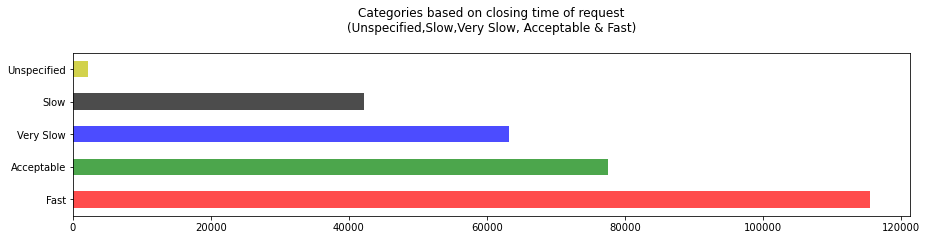

In [110]:

cust_data['Request_Closing_Time_Category'].value_counts()

#Plotting 
cust_data['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3))
plt.title("Categories based on closing time of request\n(Unspecified,Slow,Very Slow, Acceptable & Fast)\n")
plt.show()



# Fetching out the month depending on the creation date

In [15]:
month=pd.Series({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [16]:
def getMonth(Date):
    a = str(Date)
    datee = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return month[datee.month]


In [17]:
cust_data['Created Month']=cust_data['Created Date'].apply(getMonth)
cust_data['Created Month'].head()
names=month.values
print(names)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


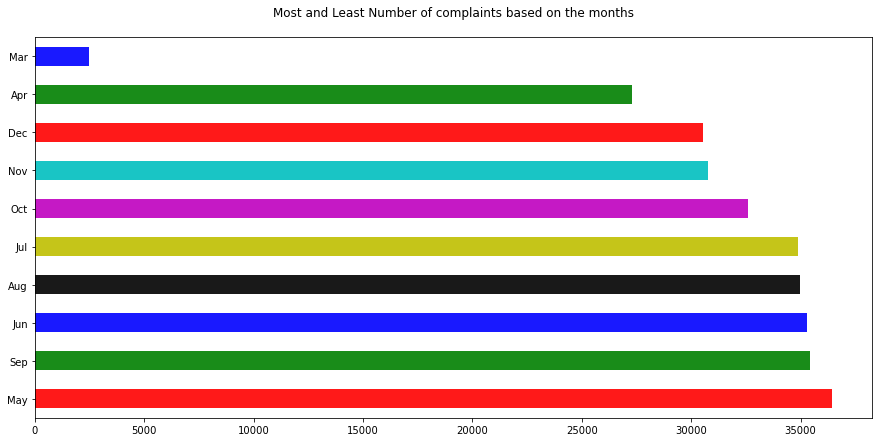

In [18]:
#Insight 2nd to check most & least complaint based on the months
cust_data['Created Month'].value_counts().plot(kind="barh", color=list('rgbkymc'),alpha=0.9, figsize=(15,7))
plt.title("Most and Least Number of complaints based on the months\n")     
plt.show()

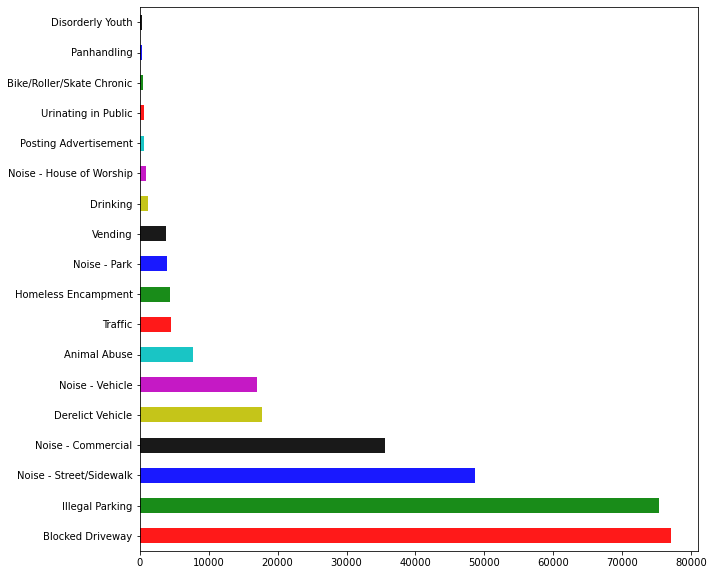

In [19]:
cust_data['Complaint Type'].value_counts()[:-6].plot(kind='barh',color=list('rgbkymc'), alpha=.9, figsize=(10,10),title="Most types of complaints")
plt.show()

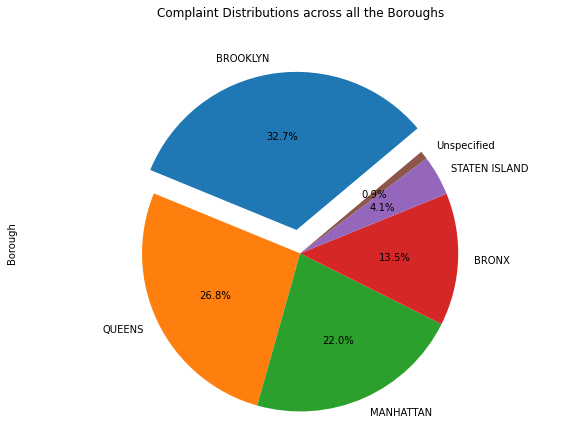

In [19]:
cust_data['Borough'].value_counts().plot(kind='pie',autopct="%1.1f%%",explode=(0.15,0,0,0,0,0),startangle=40,figsize=(10,7))
plt.axis('equal')
plt.title("Complaint Distributions across all the Boroughs\n\n")
plt.show()

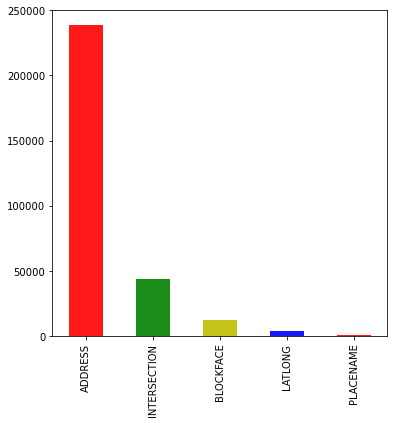

In [59]:
cust_data['Address Type'].value_counts().plot(kind='bar',color=list('rgyb'),alpha=0.9,figsize=(6,6))
plt.show()

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.


In [20]:
cust_data['City'].isnull().sum()
# Filling values in place NaN
cust_data['City'].fillna('Unknown Location',inplace=True)

#Grouping the Complaint Types based on Request Closing Time 
cust_data_grouped = cust_data.groupby(['City', 'Complaint Type'])
cust_data_mean=cust_data_grouped.mean()['Request_Closing_In_Hr']
#Mean based on city ,complaint type and Closing time
cust_data_grouped = cust_data.groupby(['City', 'Complaint Type']).agg({'Request_Closing_In_Hr':'mean'})
cust_data_grouped

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [21]:
cust_data_grouped['Request_Closing_In_Hr'].isnull()

City      Complaint Type         
ARVERNE   Animal Abuse               False
          Blocked Driveway           False
          Derelict Vehicle           False
          Disorderly Youth           False
          Drinking                   False
                                     ...  
Woodside  Blocked Driveway           False
          Derelict Vehicle           False
          Illegal Parking            False
          Noise - Commercial         False
          Noise - Street/Sidewalk    False
Name: Request_Closing_In_Hr, Length: 782, dtype: bool

In [22]:
#dropping NaN values
cust_data_grouped[cust_data_grouped['Request_Closing_In_Hr'].isnull()]
cust_data_grouped_withoutna=cust_data_grouped.dropna()
cust_data_grouped_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [23]:
print(cust_data_grouped_withoutna)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


# Whether the average response time across complaint types is similar or not (overall)


In [24]:
#################################################--------  OLS  -----------#####################################################
#______________________________________________________________________________________________________________________________#


#Here, H0 will be avg. response time = complaint type
#      H1 will be avg. reponse time  != complaint type
    
###################_____________________________________________________________________________________________################

from statsmodels.formula.api import ols
import statsmodels.api as sm

cust_data['Complaint_Type']=cust_data['Complaint Type']

fit=ols('Request_Closing_In_Hr~Complaint_Type',data=cust_data).fit()
annova=sm.stats.anova_lm(fit)
annova

,df,sum_sq,mean_sq,F,PR(>F)
Complaint_Type,23.0,4.041941e+05,17573.655683,491.837221,0.0
Residual,298511.0,1.066599e+07,35.730634,NaN,NaN


# Are the type of complaint or service requested and location related?


In [57]:
#Here "chi-square test" will be performed to check whether complaint service is independent of location or related.

#Here ,H0 is complaint types are related to location-->(dependent)
# &    H1 is complaint types are not related to location-->(independent)

from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_cust_ind=pd.crosstab(cust_data.City,cust_data.Complaint_Type)
conti_table=df_cust_ind

#Contingency table
stat, p, dof, expected = chi2_contingency(conti_table)
print("Degree of freedom {}".format(dof))
print("P-value is {}".format(p))
print("Expected {}".format(expected))

#test statistics

probability=0.95
critical=chi2.ppf(probability,dof)
print('\nprobability=%.2f, critical=%.2f, stat=%.2f \n' % (probability, critical, stat))

# if(abs(stat)>critical):
#     print("Dependent (reject H0)")
# else:
#     print("Independent fail to reject H0")

    
alpha_val=1.0-probability
print("Significance=%.2f,\n\np-value=%.2f"%(alpha_val,p))

if p<=alpha_val:
    print("\n\nFinal conclusion=Reject null hypothesis means complaint types are not related to locations and are independent")
else:
    print("Failed to reject null hypothesis means complaint types are related to locations")

Degree of freedom 1219
P-value is 0.0
Expected [[4.38978643e-03 5.69062648e+00 7.31631072e-04 ... 3.29087656e+00
  4.33125594e-01 2.78166133e+00]
 [1.26306128e-01 1.63734844e+02 2.10510213e-02 ... 9.46874938e+01
  1.24622046e+01 8.00359829e+01]
 [1.43067130e-02 1.85462690e+01 2.38445217e-03 ... 1.07252659e+01
  1.41159569e+00 9.06568717e+00]
 ...
 [4.91656080e-02 6.37350165e+01 8.19426800e-03 ... 3.68578175e+01
  4.85100666e+00 3.11546069e+01]
 [7.07154687e-02 9.16708192e+01 1.17859114e-02 ... 5.30130297e+01
  6.97725958e+00 4.48100353e+01]
 [2.39442896e-03 3.10397808e+00 3.99071494e-04 ... 1.79502358e+00
  2.36250324e-01 1.51726982e+00]]

probability=0.95, critical=1301.34, stat=121788.33 

Significance=0.05,

p-value=0.00


Final conclusion=Reject null hypothesis means complaint types are not related to locations and are independent
